# Shollow network in tf

In [1]:
import tensorflow

In [43]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [32]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [33]:
X_test.shape

(10000, 28, 28)

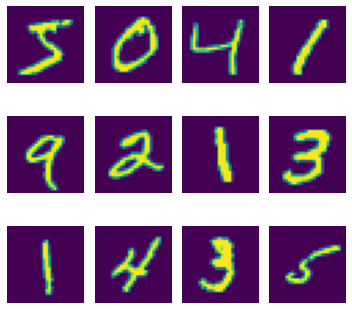

In [34]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
Y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

TypeError: Invalid shape (784,) for image data

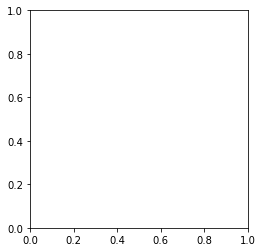

In [46]:
plt.imshow(X_test[1],cmap='Greys')

In [23]:
X_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# preprocessing

In [37]:
X_train = X_train.reshape(60000, (28*28)).astype('float32')
X_test = X_test.reshape(10000, (28*28)).astype('float32')

In [40]:
X_train /=255
X_test /=255

In [42]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
n_classes = 10
Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test,n_classes)

In [45]:
Y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Model

In [48]:
model = Sequential()

model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

model.add(Dense(10, activation='softmax'))

2021-12-04 11:18:59.823350: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-04 11:18:59.825274: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# compile

In [52]:
model.compile(loss ='mean_squared_error',optimizer= SGD(learning_rate=0.01),metrics=['accuracy'])

# Fit/Train

In [53]:
model.fit(x= X_train,y= Y_train,epochs=100, batch_size=128,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0994 - accuracy: 0.1126 - val_loss: 0.0971 - val_accuracy: 0.1178
Epoch 2/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0957 - accuracy: 0.1186 - val_loss: 0.0944 - val_accuracy: 0.1212
Epoch 3/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0935 - accuracy: 0.1312 - val_loss: 0.0927 - val_accuracy: 0.1533
Epoch 4/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0920 - accuracy: 0.1684 - val_loss: 0.0915 - val_accuracy: 0.1891
Epoch 5/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0910 - accuracy: 0.2013 - val_loss: 0.0905 - val_accuracy: 0.2160
Epoch 6/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0902 - accuracy: 0.2206 - val_loss: 0.0898 - val_accuracy: 0.2327
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0687 - accuracy: 0.5258 - val_loss: 0.0682 - val_accuracy: 0.5277
Epoch 56/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0682 - accuracy: 0.5316 - val_loss: 0.0678 - val_accuracy: 0.5340
Epoch 57/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0678 - accuracy: 0.5367 - val_loss: 0.0673 - val_accuracy: 0.5410
Epoch 58/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0673 - accuracy: 0.5419 - val_loss: 0.0668 - val_accuracy: 0.5466
Epoch 59/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0669 - accuracy: 0.5472 - val_loss: 0.0664 - val_accuracy: 0.5517
Epoch 60/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0664 - accuracy: 0.5522 - val_loss: 0.0659 - val_accuracy: 0.5584
Epoch 61/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0660 - ac

# evaluate

In [55]:
model.evaluate(X_test, Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.04978418440818787, 0.7176]

In [60]:
X_test_1 = X_test[1].reshape(1,784)

In [61]:
X_test_1.shape

(1, 784)

In [62]:
model.predict(X_test_1)

array([[0.09937339, 0.06609013, 0.28731906, 0.13993509, 0.0311485 ,
        0.05078496, 0.21733798, 0.00912843, 0.06814945, 0.03073301]],
      dtype=float32)

In [63]:
model.predict_classes(X_test_1)

array([2])